# Lecture 1 Assignment

- Name: *Kenneth Cahilog*
- ID number: *23104856*
- Course: *Bachelor of Science in Computer Science*

Given the following graph, implement Kruskal's, Prim's, and Dijkstra's shortest path algorithm in Python.

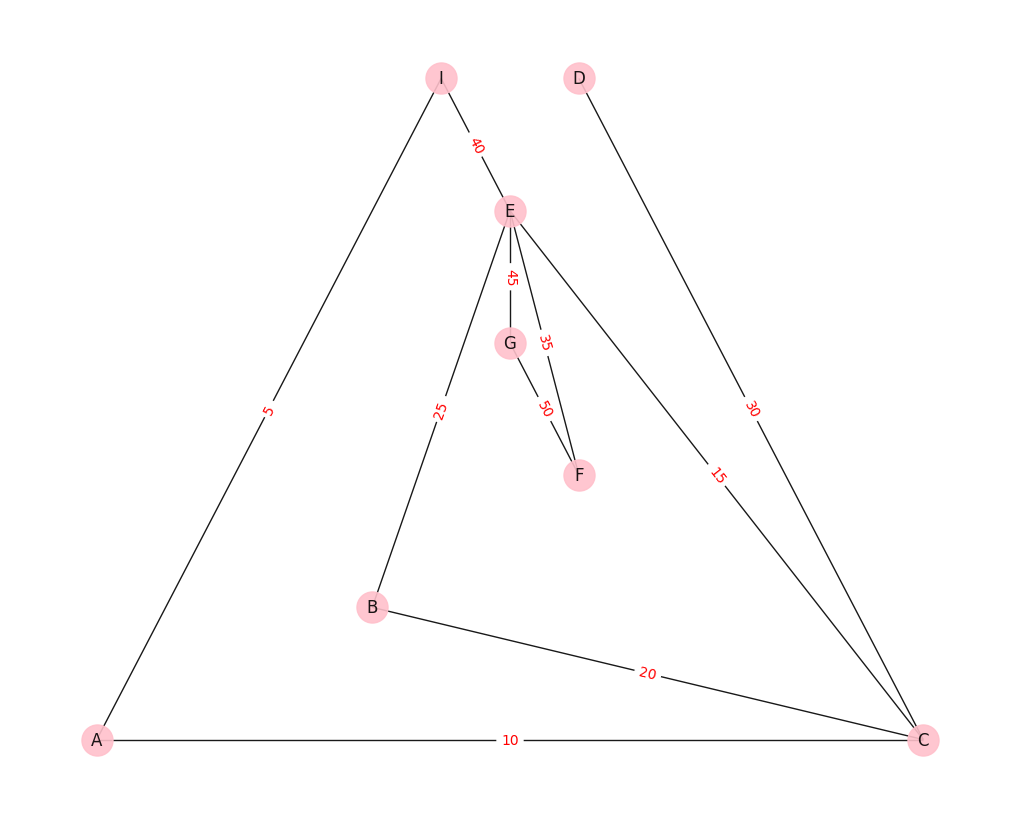

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Use seed for reproducibility
seed = 55

## Initiate graph
graph = nx.Graph()
plt.figure(figsize=(10, 8))

# Add nodes
graph.add_nodes_from(["A","B","C","D","E","F","G"])

# Add edges
edgelist = [("A","C", 10),("A","I", 5),("C","B", 20),("C","E", 15),("C","D", 30),("B","E", 25),("I","E", 40),("E","F", 35),("F","G", 50),("G","E", 45)]
graph.add_weighted_edges_from(edgelist)

## Draw graph

pos = nx.planar_layout(graph)
nx.draw(
    graph, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True
)
nx.draw_networkx_edge_labels(
    graph, pos,
    edge_labels = {(u, v): w['weight'] for u, v, w in graph.edges(data=True)},
    font_color='red'
)

plt.show()

## Kruskal's Algorithm

Kruskal's algorithm is used to find the minimum spanning tree (MST) of a graph. It works by sorting all the edges of the graph in non-decreasing order of their weights and then adding the edges one by one to the MST, ensuring no cycles are formed, until all vertices are included.

### Implementation

In [2]:
def kruskal(graph):
    def find(parent, i):
        if parent[i] == i:
            return i
        return find(parent, parent[i])

    def union(parent, rank, x, y):
        xroot = find(parent, x)
        yroot = find(parent, y)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1

    result = []
    parent, rank = {}, {}
    weighted_edgelist = sorted(graph.edges(data=True), key=lambda tup: tup[2]['weight'])

    for node in graph.nodes:
        parent[node] = node
        rank[node] = 0

    for i in range(len(graph.edges)):
        u, v, weight = weighted_edgelist[i]
        weight = weight['weight']

        x = find(parent, u)
        y = find(parent, v)
        if x != y:
            result.append((u, v))
            union(parent, rank, x, y)

    return result

### Graph

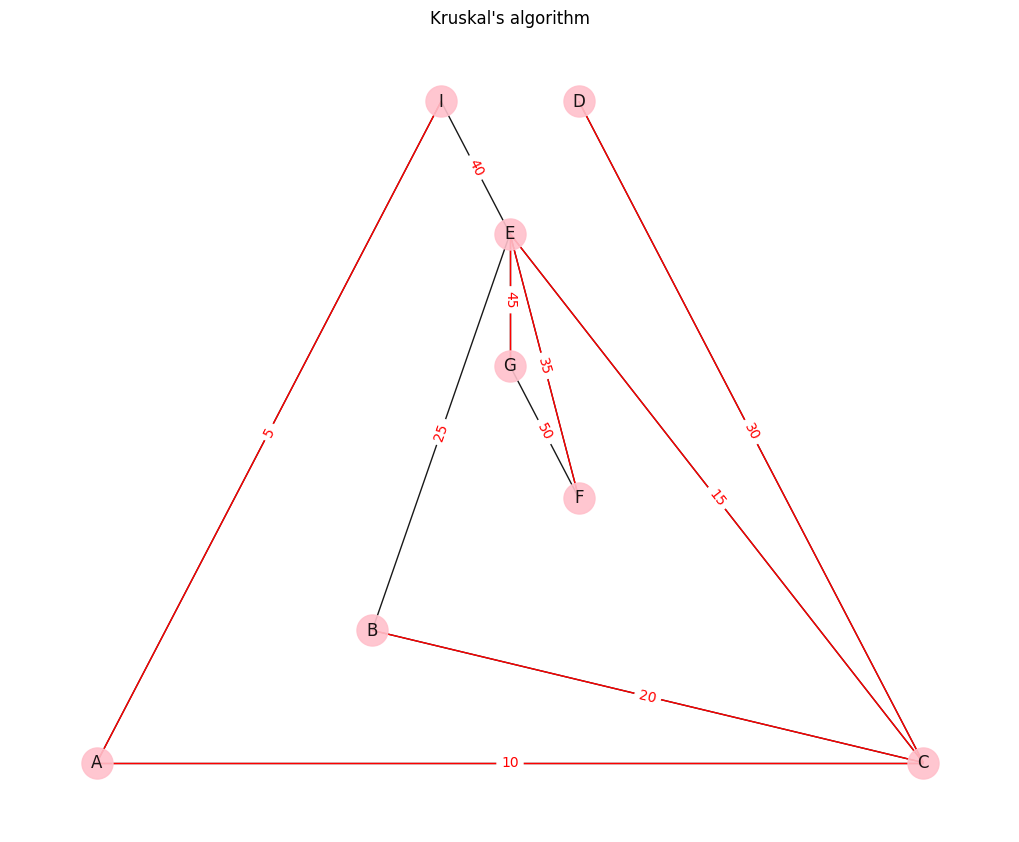

In [3]:
plt.figure(figsize=(10, 8))
pos = nx.planar_layout(graph)
nx.draw(
    graph, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True
)
nx.draw_networkx_edges(
    graph, pos, edge_color='red',
    edgelist=kruskal(graph)
)
nx.draw_networkx_edge_labels(
    graph, pos,
    edge_labels = {(u, v): w['weight'] for u, v, w in graph.edges(data=True)},
    font_color='red'
)

plt.title("Kruskal's algorithm")
plt.show()

## Prim's Algorithm

Prim's algorithm also finds the minimum spanning tree of a graph. It starts with a single vertex and grows the MST one vertex at a time by adding the cheapest edge from the tree to a vertex not yet in the tree, until all vertices are included.

### Implementation

In [4]:
def prim(graph, source):
    visited = {source}
    result = []

    for _ in range(len(graph.nodes)):
        adjacent_edges = []
        for u in visited:
            adjacent_edges += [e for e in graph.edges(u, data=True) if e[1] not in visited]
        if not adjacent_edges:
            break
        u, v, _ = min(adjacent_edges, key=lambda e: e[2]['weight'])
        result.append((u, v))
        visited.add(v)
    return result

### Graph

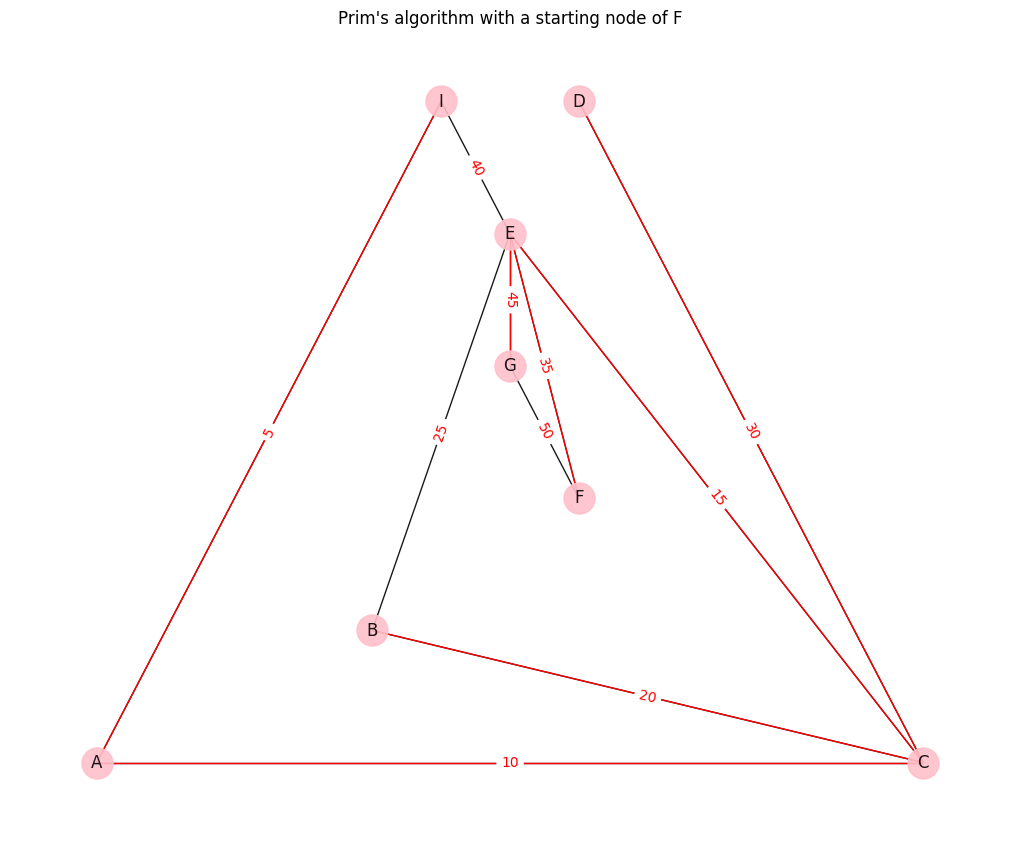

In [5]:
plt.figure(figsize=(10, 8))
pos = nx.planar_layout(graph)
nx.draw(
    graph, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True
)
nx.draw_networkx_edges(
    graph, pos, edge_color='red',
    edgelist=prim(graph, 'F')
)
nx.draw_networkx_edge_labels(
    graph, pos,
    edge_labels = {(u, v): w['weight'] for u, v, w in graph.edges(data=True)},
    font_color='red'
)

plt.title("Prim's algorithm with a starting node of F")
plt.show()

## Dijkstra's Shortest Path Algorithm

Dijkstra's algorithm finds the shortest path from a single source vertex to all other vertices in a graph with non-negative edge weights. It works by repeatedly selecting the vertex with the minimum distance, updating the distances to its neighbors, and marking it as visited until all vertices are processed.

### Implementation

In [6]:
def dijkstra(graph, source):
    visited = set()
    distance = {node: float('inf') for node in graph.nodes}
    distance[source] = 0

    for _ in range(len(graph.nodes)):
        min = float('inf')
        u = None
        for node in graph.nodes:
            if node not in visited and distance[node] < min:
                min = distance[node]
                u = node
        if u is None:
            break

        visited.add(u)

        for v in graph.nodes:
            if graph.get_edge_data(u, v) is not None and v not in visited:
                tmp = distance[u] + graph.get_edge_data(u, v)['weight']
                if tmp < distance[v]:
                    distance[v] = tmp

    return distance

### Graph

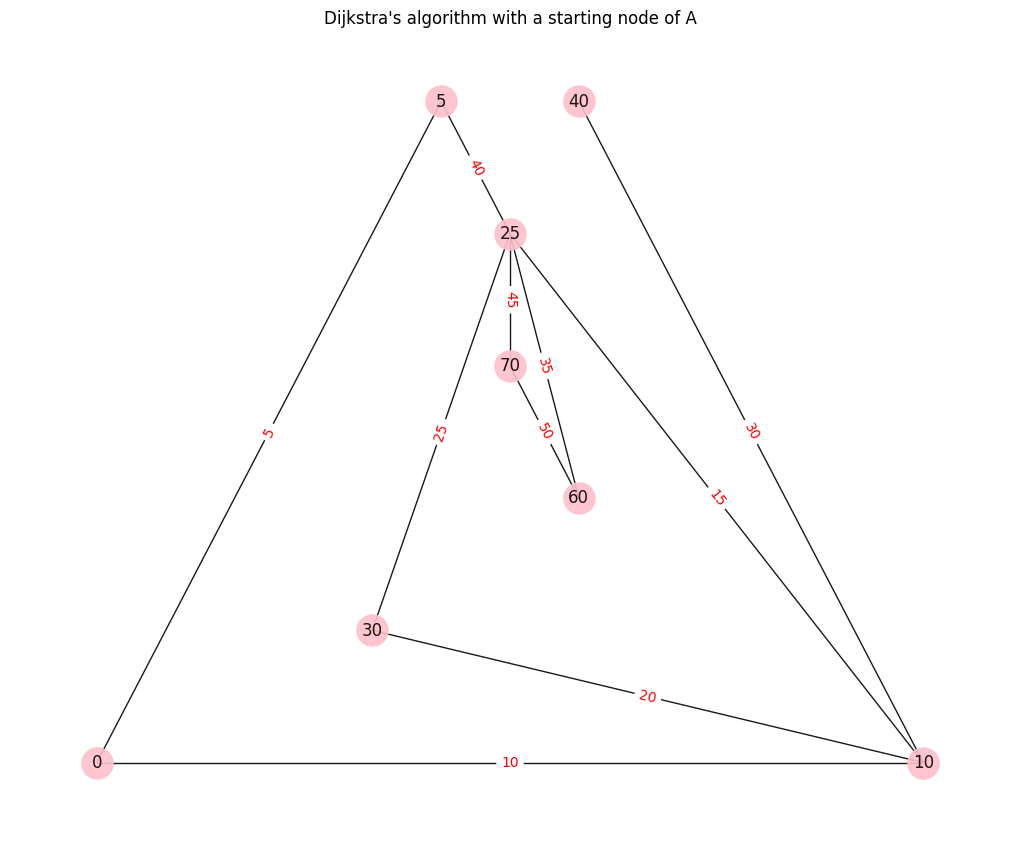

In [7]:
plt.figure(figsize=(10, 8))
pos = nx.planar_layout(graph)
nx.draw(
    graph, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9, labels=dijkstra(graph, 'A'),
    with_labels=True
)
nx.draw_networkx_edge_labels(
    graph, pos,
    edge_labels = {(u, v): w['weight'] for u, v, w in graph.edges(data=True)},
    font_color='red'
)

plt.title("Dijkstra's algorithm with a starting node of A")
plt.show()